# Using Python SSBDapi to access SSBD data for visualization and analysis

In [1]:
%config InlineBackend.figure_formats=['png']

In [2]:
from IPython.display import display

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [6]:
%matplotlib inline

## Loading ivisual library allows iPython to use VPython to display 3D graphics

* Installing ivisual can be found here https://github.com/mwcraig/ivisual-notebook-info

In [7]:
from ivisual import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading json library allows iPython to deal with JSON formatted data

In [8]:
import json

# Loading SSBDapi Library

In [9]:
import SSBDapi as ssbdapi

## Using ssbdapi function 'meta_data' to search for simulation 'sim' in the field 'basedon'

In [10]:
q=ssbdapi.ssbd()
q.set_display('on')
resultdata = q.meta_data('basedon', 'sim')

display=True
display= True
parameter= http://ssbd.qbic.riken.jp/SSBD/api/v1/meta_data/?format=json;basedon__icontains=sim;
meta= {u'previous': None, u'total_count': 105, u'offset': 0, u'limit': 20, u'next': u'/SSBD/api/v1/meta_data/?basedon__icontains=sim&offset=20&limit=20&format=json'}
found= 105
limit= 20
No.: 1
    license : CC BY-NC-SA
    citation : None
    description : quantitative single molecule dynamics of Min proteins (MinEE, MinDEE, MinDEED, and MinD) in E. coli wild-type
    contributors : Arjunan, S. N. V. and Tomita, M.
    phone : None
    URL : None
    organism : E. coli
    E_mail : satya.arjunan@riken.jp
    basedon : Simulation
    name : Satya Nanda Vel Arjunan
    dblink : http://www.ncbi.nlm.nih.gov/pubmed/20012222
    datatype : single molecule dynamics
    organization : RIKEN
    title : BDML file for quantitative information about single molecule dynamics of E. coli wild-type
    address : 6-2-3 Furuedai, Suita, Osaka 565-0874, Japan
    department : Quant

## Using ssbdapi function 'meta_data' to search for 'osaka' in the field 'address'

In [ ]:
resultdata = q.meta_data('address', 'osaka')

## Using ssbdapi function 'meta_data' to search for 'osaka' in the field 'address'

In [ ]:
resultdata = q.meta_data(field='contributors', search='keller')

## Using ssbdapi function 'data' to search for string '505' in the field 'localid'

In [ ]:
resultdata = q.data(field='localid', search='505')

## Return data is in JSON format

In [ ]:
print resultdata

## Retrieve function to get all the coordinates at a specific time point

In [11]:
def retrieve_coord_tp(bdmlID, timept, display='on'):
    q=ssbdapi.ssbd()
    q.set_display(display)
    tmp_result = q.coordXYZ(bdmlID, timept)
    total = tmp_result['meta']['total_count']
    #print "total=", total
    result=tmp_result
    tmp_offset=0
    while total>0:
        tmp_offset=tmp_offset+100
        tmp_result=q.coordXYZ(bdmlID, timept, offset=tmp_offset)
        result['objects']=result['objects']+tmp_result['objects']
        total=total-100
    return(result)

## Call retrieve coordinates function to get the coordinates of BDMLID that contains string 'd15115' at time point 15

In [12]:
resultdata=retrieve_coord_tp('d15115', 15)

display=True
display= True
parameter= http://ssbd.qbic.riken.jp/SSBD/api/v1/coordsXYZ/?format=json;bdml__bdml_ID__icontains=d15115;t=15;offset=0
meta= {u'previous': None, u'total_count': 9, u'offset': 0, u'limit': 20, u'next': None}
found= 9
limit= 20
No.: 1
    bdml : {u'bdml_ID': u'a1a96ee3-fd58-48f8-a892-4f17c1d15115', u'id': 203, u'title': u'BDML file for quantitative information about nuclear division dynamics of wild-type embryo'}
    entitytype : sphere
    radius : 1.62
    t : 15.0
    y : 342.0
    x : 160.0
    z : 6.2
No.: 2
    bdml : {u'bdml_ID': u'a1a96ee3-fd58-48f8-a892-4f17c1d15115', u'id': 203, u'title': u'BDML file for quantitative information about nuclear division dynamics of wild-type embryo'}
    entitytype : sphere
    radius : 3.33
    t : 15.0
    y : 355.0
    x : 363.0
    z : 11.7
No.: 3
    bdml : {u'bdml_ID': u'a1a96ee3-fd58-48f8-a892-4f17c1d15115', u'id': 203, u'title': u'BDML file for quantitative information about nuclear division dynamics of wild-type

## Using the ssbdapi function 'scale' and search for bdmlID using field 'bdml__bdml_ID' 

In [13]:
s=q.scale(field='bdml__bdml_ID', search='d15115') 

display= True
parameter= http://ssbd.qbic.riken.jp/SSBD/api/v1/scale/?format=json;bdml__bdml_ID__icontains=d15115;
meta= {u'previous': None, u'total_count': 1, u'offset': 0, u'limit': 20, u'next': None}
found= 1
limit= 20
No.: 1
    tScale : 1.0
    yScale : 0.09
    bdml : {u'bdml_ID': u'a1a96ee3-fd58-48f8-a892-4f17c1d15115', u'id': 203, u'title': u'BDML file for quantitative information about nuclear division dynamics of wild-type embryo'}
    zScale : 1.0
    tUnit : minute
    xScale : 0.09
    xyzUnit : micrometer


## Setup a canvas to display 3D graphics

In [14]:
canvas(title="Displaying 3D graphics", background=(0.8,0.8,0.8) )
c = color.red
r = 0.1
x = 0
y = 0
Z = 0

<IPython.core.display.Javascript object>

## Visualization - displaying the coordinates as sphere in 3D

In [15]:
for j in s['objects']:
    sx = j['xScale']
    sy = j['yScale']
    sz = j['zScale']
    sr = j['xScale']
    st = j['tScale']
    tu = j['tUnit']

In [16]:
for i in resultdata['objects']:
        sphere(pos=(i['x']*sx, i['y']*sy, i['z']*sz), color=c, radius=i['radius'])

## Analysis - plotting the proliferation curve

In [17]:
no_of_nucleus = []
timept = []
tp = 1
resultdata = retrieve_coord_tp('d15115', tp, display='off')
nn =resultdata['meta']['total_count']
while nn > 0:
    no_of_nucleus.append(nn)
    timept.append(tp)
    # print "tp="+str(tp)+" nn="+str(nn)
    tp=tp+1
    resultdata = retrieve_coord_tp('d15115', tp, display='off')
    nn =resultdata['meta']['total_count']
    
    

## Get the title, organism and contact name of the dataset

In [18]:
q.set_display('off')
resultmetadata = q.data(field='bdmlUUID', search='d15115')
for i in resultmetadata['objects']:
    title= i['meta_data']['title']
    name= i['meta_data']['name']
    pmid = i['meta_data']['PMID']
    organism = i['meta_data']['organism']

## Plotting the curve

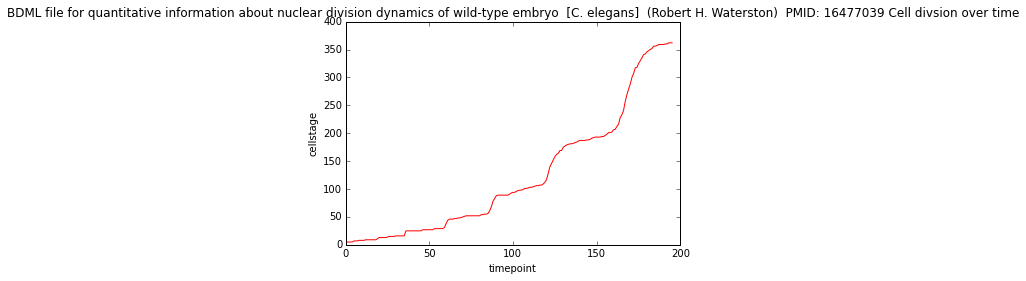

In [19]:
fig=plt.figure()
plt.plot(timept, no_of_nucleus, 'r')
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('cellstage')
ax.set_xlabel('timepoint')
plottitle = title+'  ['+organism+']  ('+name+')  PMID: '+str(pmid)+' Cell divsion over time '
plt.title(plottitle);

### Plotting using actual time instead of time point

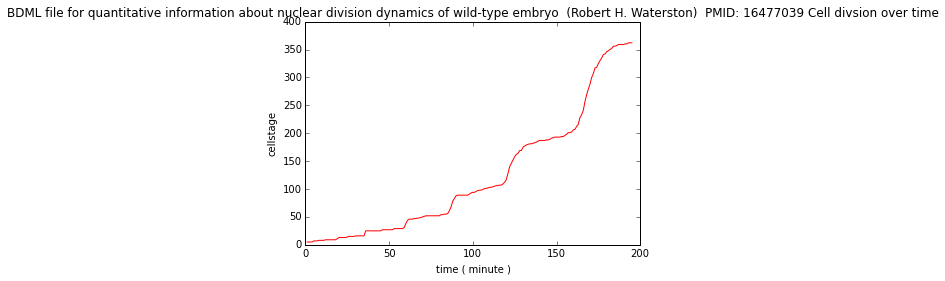

In [20]:
tmp=np.array(timept)
time=tmp*st
fig=plt.figure()
plt.plot(time, no_of_nucleus, 'r')
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('cellstage')
xlabel = 'time ( '+tu+' )'
ax.set_xlabel(xlabel)
plottitle = title+'  ('+name+')  PMID: '+str(pmid)+' Cell divsion over time '
plt.title(plottitle);